<a href="https://colab.research.google.com/github/thangpro1242002/PTDL-with-python/blob/main/Inference_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy  
from scipy import stats

In [22]:
data = pd.read_csv("Diet_R.csv")
data.head(10)

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
0,25,NaN,41,171,60,2,60.0
1,26,NaN,32,174,103,2,103.0
2,1,0.0,22,159,58,1,54.2
3,2,0.0,46,192,60,1,54.0
4,3,0.0,55,170,64,1,63.3
5,4,0.0,33,171,64,1,61.1
6,5,0.0,50,170,65,1,62.2
7,6,0.0,50,201,66,1,64.0
8,7,0.0,37,174,67,1,65.0
9,8,0.0,28,176,69,1,60.5


In [5]:
# Xem thông tin dữ liệu trong df

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Person        78 non-null     int64  
 1   gender        76 non-null     float64
 2   Age           78 non-null     int64  
 3   Height        78 non-null     int64  
 4   pre.weight    78 non-null     int64  
 5   Diet          78 non-null     int64  
 6   weight6weeks  78 non-null     float64
dtypes: float64(2), int64(5)
memory usage: 4.4 KB


In [6]:
#gender của cột 1 và 2 là Na nên loại bỏ
#sau đó sắp xếp lại theo index mới
dt = data.copy()
rm = dt.drop([0, 1])
x = rm.set_index('Person')
dtnew = x.sort_index()
dtnew.head(10)

,gender,Age,Height,pre.weight,Diet,weight6weeks
Person,,,,,,
1,0.0,22,159,58,1,54.2
2,0.0,46,192,60,1,54.0
3,0.0,55,170,64,1,63.3
4,0.0,33,171,64,1,61.1
5,0.0,50,170,65,1,62.2
6,0.0,50,201,66,1,64.0
7,0.0,37,174,67,1,65.0
8,0.0,28,176,69,1,60.5
9,0.0,28,165,70,1,68.1


In [20]:

#các hàm

def hist(inp):
    plt.figure()
    ac = sns.distplot(inp, color='blue')
    plt.axvline(np.mean(inp), color="r", linestyle="dashed", linewidth=5)
    _, max_ = plt.ylim()
    plt.text(
        inp.mean() + inp.mean() / 10,
        max_ - max_ / 10,
        "Mean: {:.2f}".format(inp.mean()),
    )
    return plt.figure



def standadize(data):
    mean = np.mean(data)
    std = np.std(data)
    return (data - mean)/std


# Task 1:Ignore diet and test to see if weight has been lost
Phát biểu giả thiết: 


H0 : μ0=μ1 . Cân nặng trung bình của trước và sau khi giảm cân là như nhau


H1 : μ0≠μ1 . Cân nặng trung bình của trước và sau khi giảm cân khác nhau

In [7]:
truoc = dtnew['pre.weight']
sau = dtnew['weight6weeks']

In [8]:
stt, pv = stats.ttest_ind(truoc, sau)
print('Giá trị kiểm định = ',stt)
print('pvalue  = ',pv)
if (pv > 0.05):
    print("Không có bằng chứng để bác bỏ H0 ")
    print('Điều này ngụ ý là: 𝜇0=𝜇1 . Cân nặng trung bình của trước và sau khi giảm cân là như nhau với mức ý nghĩa 5% ')
else:
    print('đã có đủ bằng chứng để bác bỏ H0')
    print('ta chấp nhận giả thiết Ha với mực ý nghĩa là 5%')
    print(' Cân nặng trung bình của trước và sau khi giảm cân khác nhau')
print('-'*50)

Giá trị kiểm định =  3.0342255247628476
pvalue  =  0.0028431949414180584
đã có đủ bằng chứng để bác bỏ H0
ta chấp nhận giả thiết Ha với mực ý nghĩa là 5%
 Cân nặng trung bình của trước và sau khi giảm cân khác nhau
--------------------------------------------------



# Task 2: Remove weight lost and get students to calculate it using before/after weights

Text(0.5, 1.0, 'Truoc va sau khi giam can')

<Figure size 432x576 with 0 Axes>

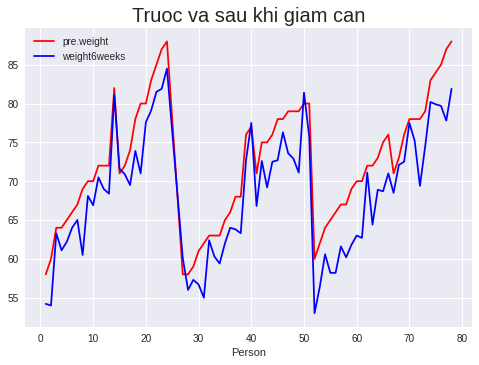

In [17]:

# Biểu đồ cân nặng trước và sau khi giảm cân

plt.figure(figsize=(6, 8))
plt.style.use('seaborn')
dtnew[['pre.weight', 'weight6weeks']].plot(color= ['r', 'b'])
plt.title('Truoc va sau khi giam can', fontsize=20)

# Task 3: Summary statistics by diet

In [36]:



dtnew['Diet'].describe()

count    76.000000
mean      2.039474
std       0.823663
min       1.000000
25%       1.000000
50%       2.000000
75%       3.000000
max       3.000000
Name: Diet, dtype: float64

In [37]:
# Bảng tần số
x = dtnew.groupby('Diet')['Diet'].count()
y = pd.DataFrame(x)
y.columns = ['Số người']
y['Phần trăm'] = y/sum(y['Số người'])*100
y

,Số người,Phần trăm
Diet,,
1,24,31.578947
2,25,32.894737
3,27,35.526316


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 7889 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 432 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 7901 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 7889 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 432 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 7901 missing from current font.
  font.set_text(s, 0, f

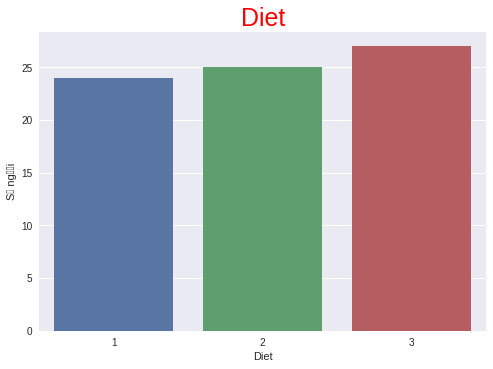

In [38]:
y.reset_index(inplace=True)

ax =sns.barplot(x='Diet',y='Số người',data = y)
plt.title('Diet', size=25, color='r')
plt.show()

In [39]:
# Lấy="Diet" và "lostweight" để phân tích 

Dl = dtnew[['Diet', 'lostweight']]
diet = dtnew.groupby('Diet').groups

type_1 = dtnew['lostweight'][diet[1]]
type_1.name = 'Diet Type 1'
type_2 = dtnew['lostweight'][diet[2]]
type_2.name = 'Diet Type 2'
type_3 = dtnew['lostweight'][diet[3]]
type_3.name = 'Diet Type 3'
print(type_1.describe())
print(type_2.describe())
print(type_3.describe())

count    24.000000
mean      3.300000
std       2.240148
min      -0.600000
25%       1.975000
50%       3.050000
75%       3.950000
max       9.000000
Name: Diet Type 1, dtype: float64
count    25.000000
mean      3.268000
std       2.464535
min      -2.100000
25%       2.000000
50%       3.500000
75%       4.700000
max       7.900000
Name: Diet Type 2, dtype: float64
count    27.000000
mean      5.148148
std       2.395568
min       0.500000
25%       3.450000
50%       5.400000
75%       7.000000
max       9.200000
Name: Diet Type 3, dtype: float64


# Task4:One way ANOVA

Xây dựng giả thiết:


$H_0: \mu_1 = \mu_2 = \mu_3$


$H_1: \mu_i \neq \mu_j$ (i $\neq$ j , i, j $\in \overline{1,3}$)

In [41]:
# Kích thước của các mẫu không bằng nhau nên ta lấy ngẫu nhiên 20 giá trị 

type1 = type_1.sample(20)
type2 = type_2.sample(20)
type3 = type_3.sample(20)

# Kiểm tra mỗi nhóm có thuộc phân phối chuẩn chưa
Sử dụng Shapiro-Wilk test

Phát biểu giả thiết:

$H_0$: Diet type 1 là dữ liệu tuân theo phân phối chuẩn

$H_1$: Diet type 1 không phải là dữ liệu tuân theo phân phối chuẩn

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


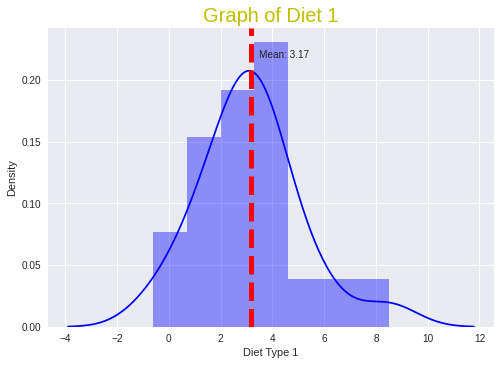

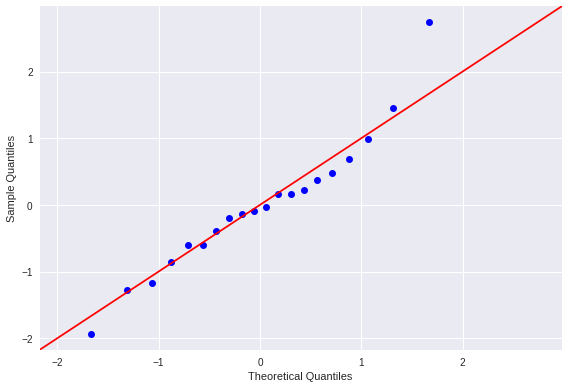

In [49]:
hist(type1)
plt.title('Graph of Diet 1',  size=20, color='y')
sm.qqplot(standadize(type1), line ='45')
plt.tight_layout()
plt.show()

In [50]:

st1, p1 = stats.shapiro(type1)
print('statistic of Diet type 1 = ',st1)
print('pvalue of Diet type 1 = ',p1)
if (p1 > 0.05):
    print("Không có bằng chứng để bác bỏ H0: ")
    print('Điều này ngụ ý là Diet type 1 là dữ liệu tuân theo phân phối chuẩn với mức ý nghĩa 5% ')
    print('Đủ điều kiện để phân tích tiếp')
else:
    print('đã có đủ bằng chứng để bác bỏ H0')
    print('ta chấp nhận giả thiết Ha với mực ý nghĩa là 5%')
    print('Diet type 1 không phải là dữ liệu tuân theo phân phối chuẩn')

statistic of Diet type 1 =  0.9604766368865967
pvalue of Diet type 1 =  0.5534143447875977
Không có bằng chứng để bác bỏ H0: 
Điều này ngụ ý là Diet type 1 là dữ liệu tuân theo phân phối chuẩn với mức ý nghĩa 5% 
Đủ điều kiện để phân tích tiếp



Phát biểu giả thiết:

$H_0$: Diet type 2 là dữ liệu tuân theo phân phối chuẩn


$H_1$: Diet type 2 không phải là dữ liệu tuân theo phân phối chuẩn

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


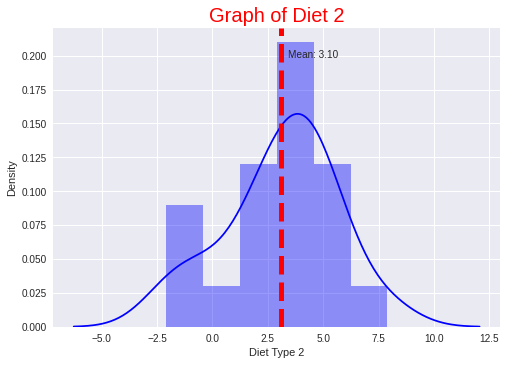

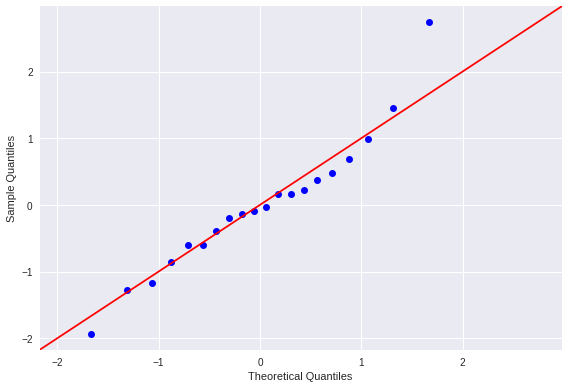

In [51]:
hist(type2)
plt.title('Graph of Diet 2', size=20, color='r')
sm.qqplot(standadize(type1), line ='45')
plt.tight_layout()
plt.show()

In [52]:
st2, p2 = stats.shapiro(type2)
print('statistic of Diet type 2 = ',st2)
print('pvalue of Diet type 2 = ',p2)
if (p2 > 0.05):
    print("Không có bằng chứng để bác bỏ H0 ")
    print('Điều này ngụ ý là Diet type 2 là dữ liệu tuân theo phân phối chuẩn với mức ý nghĩa 5% ')
    print('Đủ điều kiện để phân tích tiếp')
else:
    print('đã có đủ bằng chứng để bác bỏ H0')
    print('ta chấp nhận giả thiết Ha với mực ý nghĩa là 5%')
    print('Diet type 2 không phải là dữ liệu tuân theo phân phối chuẩn')

statistic of Diet type 2 =  0.9656747579574585
pvalue of Diet type 2 =  0.6622013449668884
Không có bằng chứng để bác bỏ H0 
Điều này ngụ ý là Diet type 2 là dữ liệu tuân theo phân phối chuẩn với mức ý nghĩa 5% 
Đủ điều kiện để phân tích tiếp


Phát biểu giả thiết:

$H_0$: Diet type 3 là dữ liệu tuân theo phân phối chuẩn

$H_1$: Diet type 3 không phải là dữ liệu tuân theo phân phối chuẩn

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


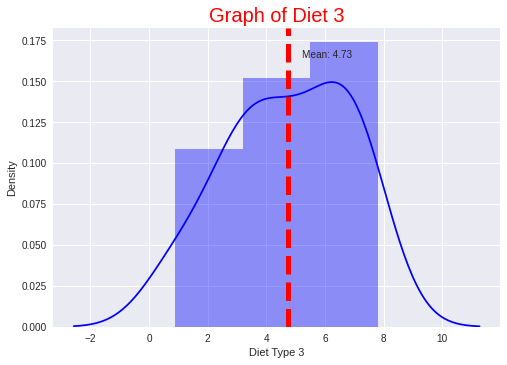

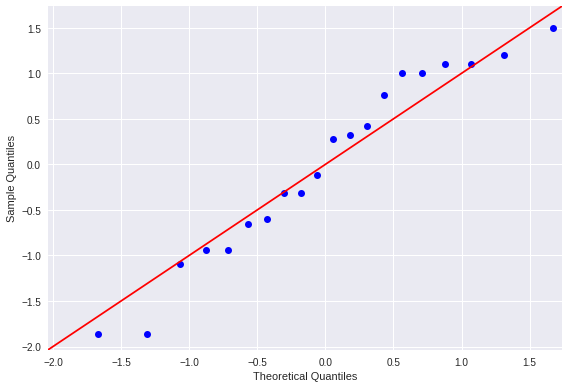

In [53]:
hist(type3)
plt.title('Graph of Diet 3',  size=20, color='r')
sm.qqplot(standadize(type3), line ='45')
plt.tight_layout()
plt.show()

In [54]:
st3, p3 = stats.shapiro(type3)
print('statistic of Diet type 3 = ',st3)
print('pvalue of Diet type 13 = ',p3)
if (p3 > 0.05):
    print("Không có bằng chứng để bác bỏ H0")
    print('Điều này ngụ ý là: Diet type 3 là dữ liệu tuân theo phân phối chuẩn với mức ý nghĩa 5%')
    print('Đủ điều kiện để phân tích tiếp')
else:
    print('đã có đủ bằng chứng để bác bỏ H0')
    print('ta chấp nhận giả thiết Ha với mực ý nghĩa là 5%')
    print('Diet type 3 không phải là dữ liệu tuân theo phân phối chuẩn')

statistic of Diet type 3 =  0.9407562613487244
pvalue of Diet type 13 =  0.2477945238351822
Không có bằng chứng để bác bỏ H0
Điều này ngụ ý là: Diet type 3 là dữ liệu tuân theo phân phối chuẩn với mức ý nghĩa 5%
Đủ điều kiện để phân tích tiếp


In [55]:
st13, p13 = stats.bartlett(type1, type2, type3)
print('statistic by Bartlett = ',st13)
print('pvalue by Bartlett = ',p13)
if (p13 > 0.05):
    print('Không có bằng chứng để bác bỏ H0')
    print('Điều này ngụ ý Các mẫu có phương sai giống nhau')
    print('Đủ điều kiện đê phân tích ANOVA')
else:
    print('Đã có đủ bằng chứng để bác bỏ giả thuyết Ho')
    print('Ta chấp nhận giả thuyết Ha với mức ý nghĩa là 5%:')
    print('Có ít nhất 2 feature có phương sai khác nhau')

statistic by Bartlett =  1.1536577806679615
pvalue by Bartlett =  0.5616766838168985
Không có bằng chứng để bác bỏ H0
Điều này ngụ ý Các mẫu có phương sai giống nhau
Đủ điều kiện đê phân tích ANOVA


# Kiểm định ANOVA one way

Phát biểu giả thiết:
$H_{0}: \mu_{1} = \mu_{2} = \mu_{3}$

$H_{a}: \text{Có tối thiểu một cặp giá trị trung bình có giá trị khác nhau}$

In [56]:

from scipy.stats import f_oneway
st, p = f_oneway(type1, type2, type3)
alpha = 0.05
print('Giá trị kiểm định: ',st)
print('p_value: ',p)
if (p < alpha):
    print('Có bằng chứng bác bỏ giả thuyết H0')
else:
    print("Không đủ bằng chứng bác bỏ giả thuyết H0.")
    print("Với mức ý nghĩa 5%: ")
    print("Điều này ngụ ý rằng hiệu quả giữa các phương pháp không có sự khác biệt")

Giá trị kiểm định:  3.48344957358774
p_value:  0.03738586056514141
Có bằng chứng bác bỏ giả thuyết H0


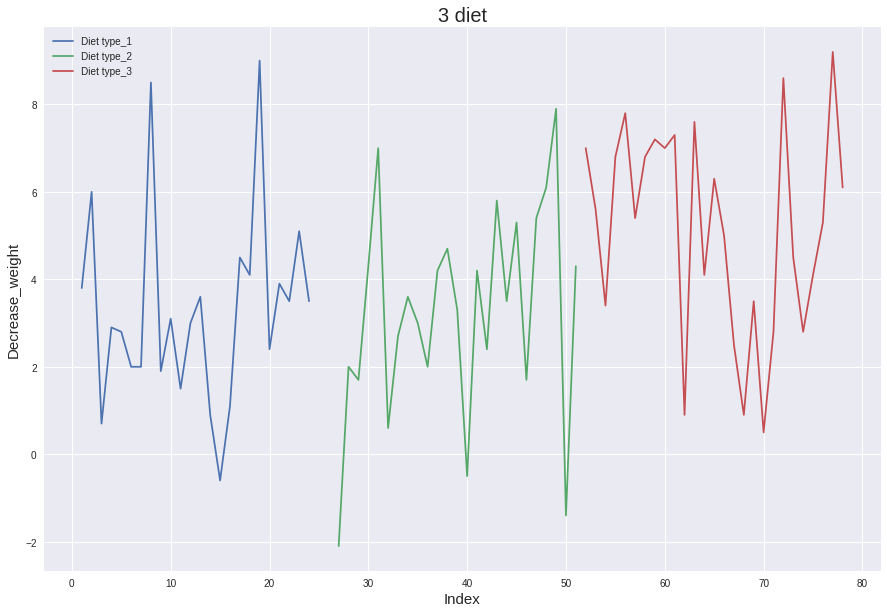

In [57]:
plt.figure(figsize=(15, 10))
plt.plot(type_1)
plt.plot(type_2)
plt.plot(type_3)
plt.title("3 diet", fontsize=20)
plt.xlabel("Index", fontsize=15)
plt.ylabel("Decrease_weight", fontsize=15)
plt.legend(["Diet type_1", "Diet type_2", "Diet type_3"])

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Count')

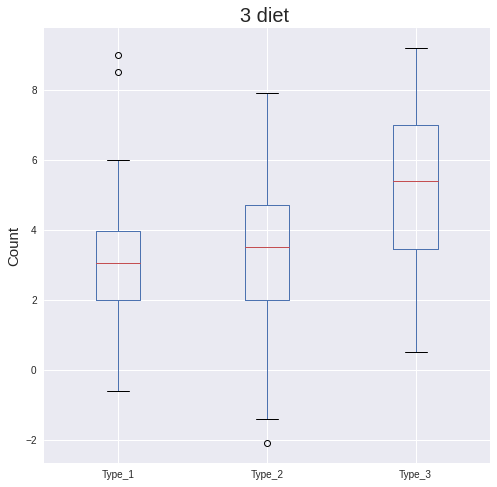

In [58]:
plt.figure(figsize=(8, 8))
plt.title('3 diet ', fontsize=20)
pd.DataFrame({'Type_1': type_1, 'Type_2': type_2, 'Type_3': type_3}).boxplot()
plt.ylabel('Count', fontsize=15)

4.2: Are there gender differences for weight lost?

Xây dựng giả thuyết

$H_0:$ Khả năng giảm cân phụ thuộc vào giới tính

$H_0:$ Khả năng giảm cân không phụ thuộc vào giới tính

In [62]:
dtt = dtnew[['gender', 'lostweight']]
dtt

,gender,lostweight
Person,,
1,0.0,3.8
2,0.0,6.0
3,0.0,0.7
4,0.0,2.9
5,0.0,2.8
...,...,...
74,1.0,2.8
75,1.0,4.1
76,1.0,5.3


In [63]:
# Bảng tần số
gen = dtt.groupby('gender')['gender'].count()
gend = pd.DataFrame(gen)
gend.columns = ['Số người']
gend['Phần trăm'] = gend/sum(gend['Số người'])*100
gend

,Số người,Phần trăm
gender,,
0.0,43,56.578947
1.0,33,43.421053


In [65]:
# Nhóm các mẫu
gr = dtt.groupby('gender').groups
fema = dtt['lostweight'][gr[0]]
fema.name = 'Female'
ma = dtt['lostweight'][gr[1]]
ma.name = 'Male'

In [66]:
female = fema.sample(30)
male = ma.sample(30)

Phát biểu giả thiết:

$H_0$: male là dữ liệu tuân theo phân phối chuẩn

$H_a$: male không phải là dữ liệu tuân theo phân phối chuẩn

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


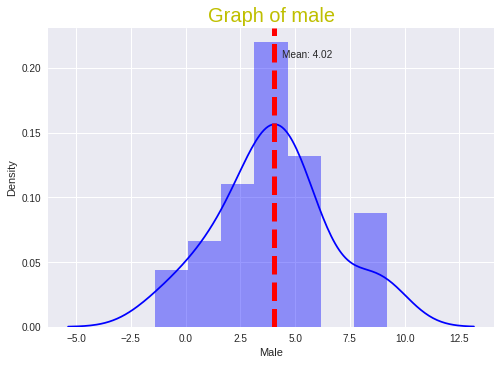

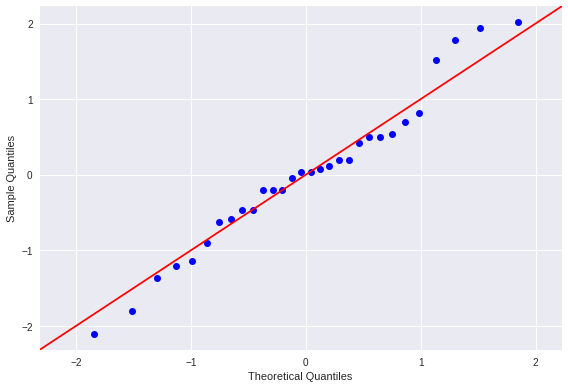

In [67]:
hist(male)
plt.title('Graph of male',  size=20, color='y')
sm.qqplot(standadize(male), line ='45')
plt.tight_layout()
plt.show()

In [68]:
stm, pm = stats.shapiro(male)
print('statistic of Diet female = ',stm)
print('pvalue of Diet female = ',pm)
if (pm > 0.05):
    print("Không có bằng chứng để bác bỏ H0")
    print('Điều này ngụ ý là male là dữ liệu tuân theo phân phối chuẩn với mức ý nghĩa 5% ')
    print('Đủ điều kiện để phân tích tiếp')
else:
    print('đã có đủ bằng chứng để bác bỏ H0')
    print('ta chấp nhận giả thiết Ha với mực ý nghĩa là 5%')
    print('male không phải là dữ liệu tuân theo phân phối chuẩn')

statistic of Diet female =  0.9719653129577637
pvalue of Diet female =  0.5942355394363403
Không có bằng chứng để bác bỏ H0
Điều này ngụ ý là male là dữ liệu tuân theo phân phối chuẩn với mức ý nghĩa 5% 
Đủ điều kiện để phân tích tiếp



# Kiểm định tính thuần nhất phương sai (homogeneity of variance)
# Bartlett’s Test
Phát biểu các giả thiết:

$H_0$: Các feature đều có phương sai đồng nhất

$H_1$: Có ít nhất 2 feature có phương sai khác nhau (lớn)

Chú ý: Nếu p < 0.05 = $\alpha$ thì loại giả thiết $H_0$. Tức là các feature không đồng nhất về phương sai

In [69]:
stfm, pfm = stats.bartlett(female, male)
print('statistic by Bartlett = ',stfm)
print('pvalue by Bartlett = ',pfm)
if (pfm > 0.05):
    print('Không có bằng chứng để bác bỏ H0')
    print('Điều này ngụ ý Các mẫu có phương sai giống nhau')
    print('Đủ điều kiện đê phân tích ANOVA')
else:
    print('Đã có đủ bằng chứng để bác bỏ giả thuyết Ho')
    print('Ta chấp nhận giả thuyết Ha với mức ý nghĩa là 5%:')
    print('Có ít nhất 2 feature có phương sai khác nhau')

statistic by Bartlett =  0.03704926651014722
pvalue by Bartlett =  0.8473647756960299
Không có bằng chứng để bác bỏ H0
Điều này ngụ ý Các mẫu có phương sai giống nhau
Đủ điều kiện đê phân tích ANOVA


Xây dựng giả thuyết:

$H_{0}: \mu_{1} = \mu_{2} = \mu_{3}$

$H_{a}: \text{Có tối thiểu một cặp giá trị trung bình có giá trị khác nhau}$

In [70]:
st, p = f_oneway(type1, type2, type3)
alpha = 0.05
print('Giá trị kiểm định: ',st)
print('p_value: ',p)
if (p < alpha):
    print('Có bằng chứng bác bỏ giả thuyết H0')
else:
    print("Không đủ bằng chứng bác bỏ giả thuyết H0.")
    print("Với mức ý nghĩa 5%: ")

Giá trị kiểm định:  3.48344957358774
p_value:  0.03738586056514141
Có bằng chứng bác bỏ giả thuyết H0


In [71]:
# ANOVA Table
model = ols('lostweight ~ C(gender)', data=dtnew).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(gender),0.278485,1.0,0.043786,0.834827
Residual,470.650331,74.0,NaN,NaN


In [72]:

# Hậu kiểm ANOVA
tukey = pairwise_tukeyhsd(endog=dtnew['lostweight'],
                          groups=dtnew['gender'],
                          alpha=0.05)
tukey.summary()

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


group1,group2,meandiff,p-adj,lower,upper,reject
0.0,1.0,0.1221,0.8397,-1.0408,1.2851,False


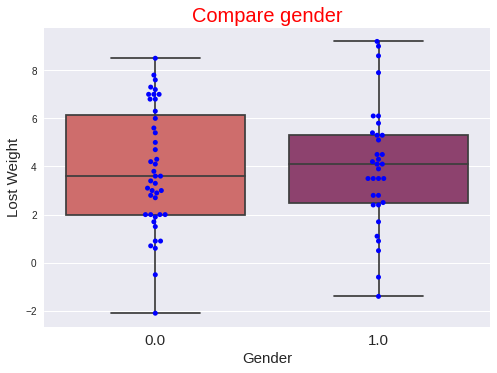

In [73]:
### Kỹ thuật EDA:
dt = dt.replace(to_replace =[0,1], 
                            value =['Female','Male'])
sns.boxplot(x='gender', y='lostweight', data=dtnew, palette='flare')
sns.swarmplot(x="gender", y='lostweight', data=dtnew, color='b')
plt.title('Compare gender',  size=20, color='r')
plt.xticks(size=15)
plt.xlabel('Gender',fontsize=15)
plt.ylabel('Lost Weight',fontsize=15)
plt.show()

Task5: Two-way ANOVA (perform)
Giả thuyết:

$H_0$: Hiệu quả giảm cân của nam và nữ là như nhau.

$H_1$: Hiệu quả giảm cân của nam và nữ là khác nhau.

In [74]:
p = {}

def results(p, alpha=0.05):
    cols=['mean1', 'mean2', 'score','p_value', 'KetLuan']
    if p['p_value'] < alpha:
        p['KetLuan'] = f"Chấp nhận H1 với mức ý nghĩa {alpha}"
    if p['p_value'] >= alpha:
        p['KetLuan'] = f"Chấp nhận H0 với mức ý nghĩa {alpha}"
    df = pd.DataFrame(p, index=[''])
    return df[cols]

    
p['mean1'] = np.mean(female)
p['mean2'] = np.mean(male)
p['score'], p['p_value'] = stats.ttest_ind(female, male)
results(p)

,mean1,mean2,score,p_value,KetLuan
,3.65,4.016667,-0.534162,0.595271,Chấp nhận H0 với mức ý nghĩa 0.05


Task6: Interactions

Means plot of weight lost by diet and gender

In [75]:
task6 = dtnew[['Diet', 'lostweight', 'gender']]

Text(0.5, 1.0, 'Means plot of weight lost by diet and gender')

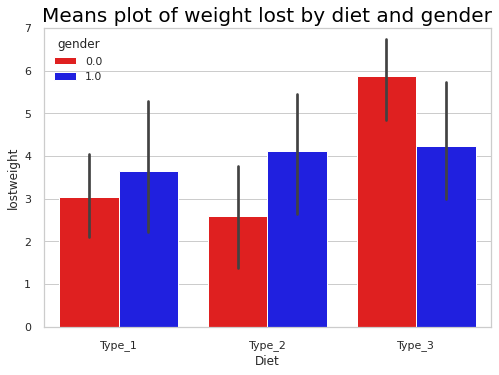

In [76]:
sns.set_theme(style="whitegrid")
g=sns.barplot(x="Diet", y="lostweight", hue="gender", data = task6, palette=['red','blue'])
g.set_xticklabels(["Type_1", "Type_2", "Type_3"])
g.set(ylim=(0, 7))
plt.title('Means plot of weight lost by diet and gender', size=20, color = 'black')

Task 7: Add height to either ANOVA

In [77]:
task7 = dtnew[['Height', 'gender', 'Diet', 'lostweight']]
task7

,Height,gender,Diet,lostweight
Person,,,,
1,159,0.0,1,3.8
2,192,0.0,1,6.0
3,170,0.0,1,0.7
4,171,0.0,1,2.9
5,170,0.0,1,2.8
...,...,...,...,...
74,183,1.0,3,2.8
75,177,1.0,3,4.1
76,164,1.0,3,5.3
